In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

import math

from scipy import stats

from sklearn import preprocessing

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn import metrics
%matplotlib inline

In [4]:
#load data into pandas
inmeta=pd.read_csv('inmeta.csv',sep=';')
inmeta

,Y,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,13500,23,46986,1.0,90,1,0,2000,3,1165
1,13750,23,72937,1.0,90,1,0,2000,3,1165
2,13950,24,41711,1.0,90,1,0,2000,3,1165
3,14950,26,48000,1.0,90,0,0,2000,3,1165
4,13750,30,38500,1.0,90,0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,NaN,86,1,0,1300,3,1025
1432,10845,72,19000,NaN,86,0,0,1300,3,1015
1433,8500,71,17016,NaN,86,0,0,1300,3,1015
1434,7250,70,16916,NaN,86,1,0,1300,3,1015


In [5]:
#clean data
inmeta.isnull()

,Y,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,True,False,False,False,False,False,False
1432,False,False,False,True,False,False,False,False,False,False
1433,False,False,False,True,False,False,False,False,False,False
1434,False,False,False,True,False,False,False,False,False,False


In [6]:
#replace missinga value by mean of the column
inmeta['Feature 3'].mean(skipna='NaN')

0.17391304347826086

In [7]:
inmeta['Feature 3'].fillna(inmeta['Feature 3'].mean(skipna='NaN'), inplace=True)

In [8]:
#to_drop = ['Feature 3']
#inmeta.drop(to_drop, inplace=True, axis=1)

In [9]:
#check one more time for null values
display(inmeta.isnull().any())

Y            False
Feature 1    False
Feature 2    False
Feature 3    False
Feature 4    False
Feature 5    False
Feature 6    False
Feature 7    False
Feature 8    False
Feature 9    False
dtype: bool

In [10]:
Cols=['Y','Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8','Feature 9']

In [11]:
#normalize data
min_max_scaler = preprocessing.MinMaxScaler()

inmeta_scaled = min_max_scaler.fit_transform(inmeta)

inmeta_normalized = pd.DataFrame(data=inmeta_scaled,columns=Cols)

In [12]:
inmeta_normalized

,Y,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,0.325044,0.278481,0.193355,1.000000,0.170732,1.0,0.0,1.000000,0.333333,0.268293
1,0.333925,0.278481,0.300149,1.000000,0.170732,1.0,0.0,1.000000,0.333333,0.268293
2,0.341030,0.291139,0.171647,1.000000,0.170732,1.0,0.0,1.000000,0.333333,0.268293
3,0.376554,0.316456,0.197528,1.000000,0.170732,0.0,0.0,1.000000,0.333333,0.268293
4,0.333925,0.367089,0.158433,1.000000,0.170732,0.0,0.0,1.000000,0.333333,0.276423
...,...,...,...,...,...,...,...,...,...,...
1431,0.111901,0.860759,0.084539,0.173913,0.138211,1.0,0.0,0.000000,0.333333,0.040650
1432,0.230728,0.898734,0.078186,0.173913,0.138211,0.0,0.0,0.000000,0.333333,0.024390
1433,0.147425,0.886076,0.070021,0.173913,0.138211,0.0,0.0,0.000000,0.333333,0.024390
1434,0.103020,0.873418,0.069609,0.173913,0.138211,1.0,0.0,0.000000,0.333333,0.024390


In [13]:
inmeta_normalized.head()


,Y,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,0.325044,0.278481,0.193355,1.0,0.170732,1.0,0.0,1.0,0.333333,0.268293
1,0.333925,0.278481,0.300149,1.0,0.170732,1.0,0.0,1.0,0.333333,0.268293
2,0.341030,0.291139,0.171647,1.0,0.170732,1.0,0.0,1.0,0.333333,0.268293
3,0.376554,0.316456,0.197528,1.0,0.170732,0.0,0.0,1.0,0.333333,0.268293
4,0.333925,0.367089,0.158433,1.0,0.170732,0.0,0.0,1.0,0.333333,0.276423


In [14]:
inmeta_normalized.describe()


,Y,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,0.226672,0.695533,0.282027,0.173913,0.264245,0.674791,0.055710,0.381183,0.677809,0.117821
std,0.128844,0.235443,0.154348,0.203588,0.121797,0.468616,0.229441,0.267403,0.317559,0.085595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145648,0.544304,0.176951,0.173913,0.170732,0.000000,0.000000,0.142857,0.333333,0.065041
50%,0.197158,0.759494,0.260859,0.173913,0.333333,1.000000,0.000000,0.428571,0.666667,0.113821
75%,0.269982,0.873418,0.358107,0.173913,0.333333,1.000000,0.000000,0.428571,1.000000,0.138211
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
inmeta_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          1436 non-null   float64
 1   Feature 1  1436 non-null   float64
 2   Feature 2  1436 non-null   float64
 3   Feature 3  1436 non-null   float64
 4   Feature 4  1436 non-null   float64
 5   Feature 5  1436 non-null   float64
 6   Feature 6  1436 non-null   float64
 7   Feature 7  1436 non-null   float64
 8   Feature 8  1436 non-null   float64
 9   Feature 9  1436 non-null   float64
dtypes: float64(10)
memory usage: 112.3 KB


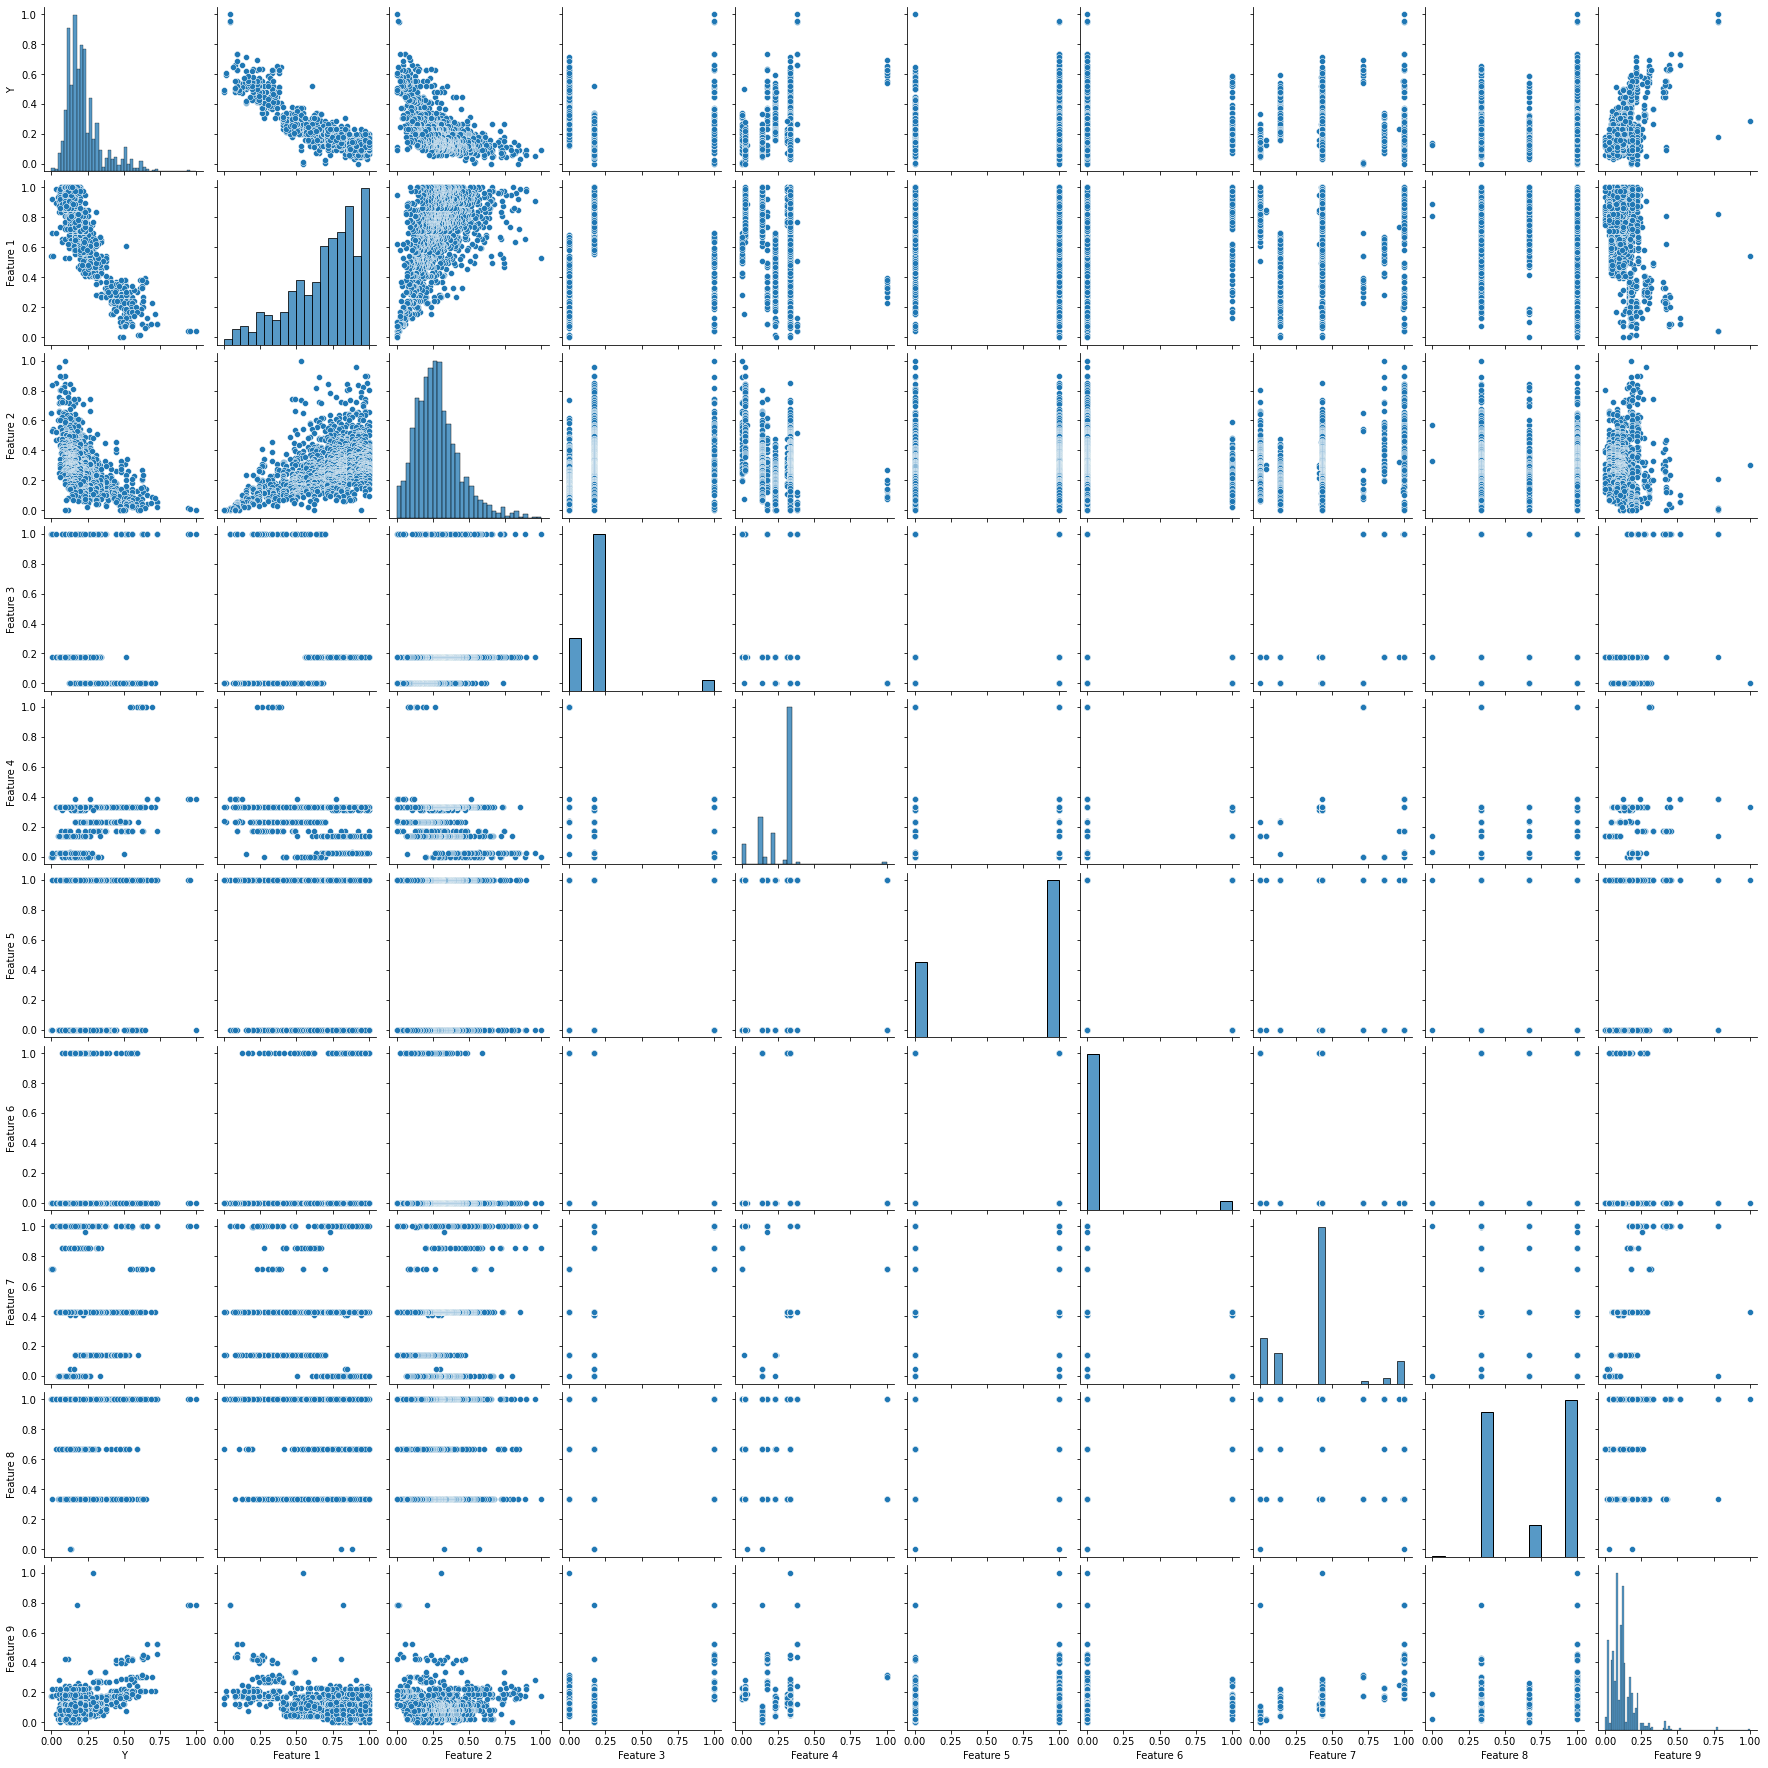

In [16]:
sns.pairplot(inmeta_normalized)

<AxesSubplot:>

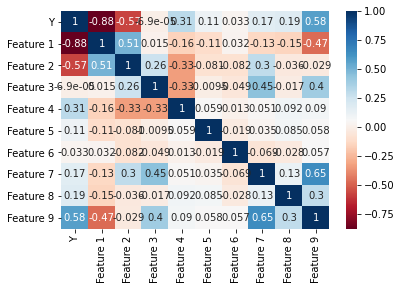

In [17]:
sns.heatmap(inmeta_normalized.corr(),cmap= 'RdBu',annot=True)

# Training Linear Regrssion

In [18]:
#build model
#split to test and train
X = inmeta_normalized.drop('Y',axis=1)
y = inmeta_normalized[['Y']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regression_model= LinearRegression()

regression_model.fit(X_train,y_train)

LinearRegression()

In [19]:
prediction=regression_model.predict(X_test)
prediction

array([[0.24584334],
       [0.16319486],
       [0.17062106],
       [0.16229225],
       [0.19983366],
       [0.12780583],
       [0.15139019],
       [0.13836265],
       [0.34209101],
       [0.30890816],
       [0.18343865],
       [0.17576573],
       [0.30228448],
       [0.30696584],
       [0.19168459],
       [0.14698735],
       [0.28351682],
       [0.46544421],
       [0.10975822],
       [0.16928708],
       [0.28986175],
       [0.47422713],
       [0.12371963],
       [0.21710234],
       [0.12099213],
       [0.41324618],
       [0.20357218],
       [0.10784949],
       [0.40992948],
       [0.35563183],
       [0.13470993],
       [0.18460553],
       [0.1469304 ],
       [0.20239148],
       [0.20766791],
       [0.13172475],
       [0.15482363],
       [0.19547117],
       [0.43449714],
       [0.18300152],
       [0.19325385],
       [0.18178697],
       [0.12511697],
       [0.05235616],
       [0.09672064],
       [0.45544778],
       [0.17942536],
       [0.223

In [20]:
print(regression_model.intercept_)

[0.41972081]


In [21]:

result0=regression_model.coef_
result0


array([[-0.33263799, -0.14164468, -0.00646784,  0.13757779,  0.00228069,
         0.00336865, -0.0543472 , -0.00719707,  0.57184088]])

In [22]:
result=np.resize(result0, (9,))
result

array([-0.33263799, -0.14164468, -0.00646784,  0.13757779,  0.00228069,
        0.00336865, -0.0543472 , -0.00719707,  0.57184088])

In [23]:
cfd=pd.DataFrame(result,X.columns)
cfd

,0
Feature 1,-0.332638
Feature 2,-0.141645
Feature 3,-0.006468
Feature 4,0.137578
Feature 5,0.002281
Feature 6,0.003369
Feature 7,-0.054347
Feature 8,-0.007197
Feature 9,0.571841


# Evaluate the model


In [24]:
#calculate the mean squared erorr
model_mse= mean_squared_error(y_test, prediction)

#calculate the mean absolute erorr
model_mae= mean_absolute_error(y_test,prediction)

#calculate the mean squared erorr
model_rmse= math.sqrt(model_mse)

print('MSE {:.3}'.format(model_mse))
print('MAE {:.3}'.format(model_mae))
print('RMSE {:.3}'.format(model_rmse))

MSE 0.00269
MAE 0.0342
RMSE 0.0519


In [27]:
model_r2=r2_score(y_test,prediction)
model_r2

0.8402389971971698

In [28]:
metrics.explained_variance_score(y_test,prediction)

0.840574218745626

In [29]:
regression_model = LinearRegression()
regression_model.fit(X,y)

print("The model explains {:.2f}% of the average price.".format(regression_model.score(X,y)*100))

The model explains 86.55% of the average price.


# Check Plots of data and predicted data

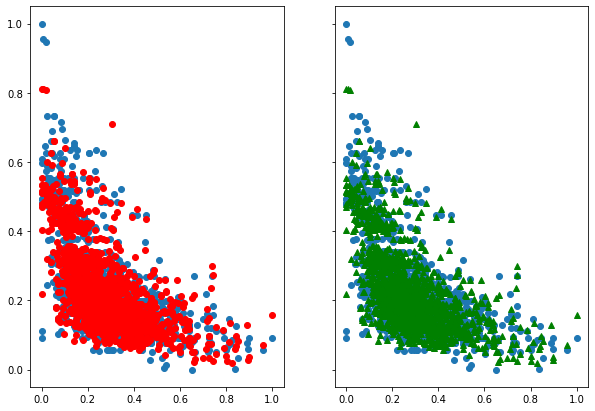

In [30]:
prediction1=regression_model.predict(X)
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,7), sharex=True, sharey=True)

# We do not need to plot against LSTAT2, just LSTAT
ax0.scatter(X["Feature 2"], y)
ax1.scatter(X["Feature 2"], y)

ax0.scatter(X["Feature 2"], prediction1.reshape((1436,)),
         color='red', lw=1, label="Predictions")

ax1.plot(X["Feature 2"], prediction1.reshape((1436,)),'r^',
         color='green',  lw=1, label="Polynomial Regression model")

# Checking the hyphothesis equation

In [31]:
theta=regression_model.coef_
theta.shape
theta

array([[-0.34469642, -0.14317102,  0.00715959,  0.14723783,  0.00128258,
         0.00725956, -0.04197123, -0.00557894,  0.48621654]])

In [32]:
Z=(regression_model.intercept_)*np.ones(y.shape)
Z.shape

(1436, 1)

In [33]:
htheta=np.dot(theta,X.T)+0.41972081
htheta.shape

(1, 1436)

In [34]:
htheta

array([[0.41624442, 0.40095452, 0.41498912, ..., 0.13586302, 0.14156777,
        0.20936312]])

In [35]:
theta=regression_model.coef_
theta.shape
theta

array([[-0.34469642, -0.14317102,  0.00715959,  0.14723783,  0.00128258,
         0.00725956, -0.04197123, -0.00557894,  0.48621654]])

In [36]:
Z=regression_model.intercept_*np.ones(y.shape)
Z.shape

(1436, 1)

In [37]:
htheta=np.dot(X,theta.T)+Z
htheta.shape

(1436, 1)

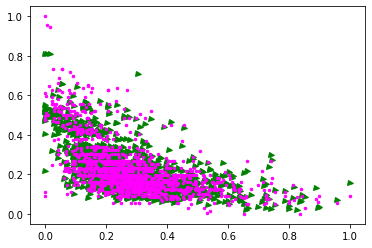

In [38]:
plt.plot(X['Feature 2'], htheta,">", c="green",markersize=5)
plt.plot(X['Feature 2'], y,".", c="magenta",markersize=5)

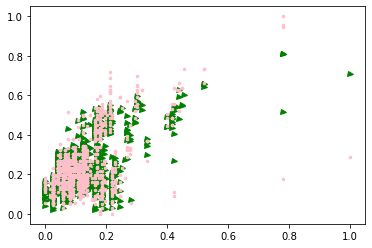

In [39]:
plt.plot(X['Feature 9'], htheta,">", c="green",markersize=5)
plt.plot(X['Feature 9'], y,".", c="pink",markersize=5)